###Exercise1

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers . scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline




2023-03-01 23:29:37.177078: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
datafile=pd.read_csv('mc-chic1.csv',index_col=0)
datafile.head()

,ep,eta,p,phi,pol,pt,qp,tx,ty,zV
0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975
1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975
2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975
3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975
4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373


In [3]:
datafile.count()

ep     208984
eta    208984
p      208984
phi    208984
pol    208984
pt     208984
qp     208984
tx     208984
ty     208984
zV     208984
dtype: int64

In [4]:
datafile.isnull().sum()

ep     0
eta    0
p      0
phi    0
pol    0
pt     0
qp     0
tx     0
ty     0
zV     0
dtype: int64

<AxesSubplot: xlabel='p', ylabel='ep'>

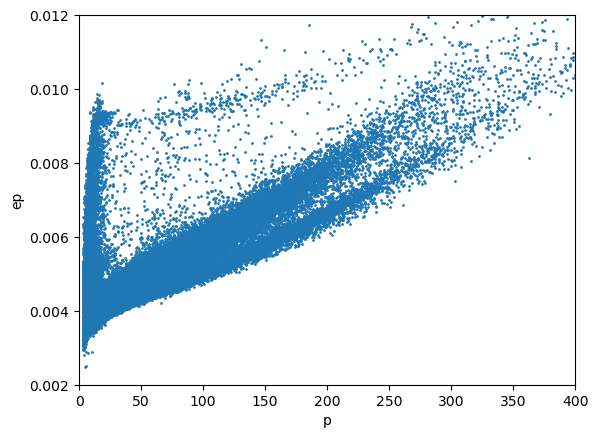

In [5]:
datafile.plot.scatter(x='p',y='ep',xlim=(0,400),ylim=(0.002,0.012),s=1)



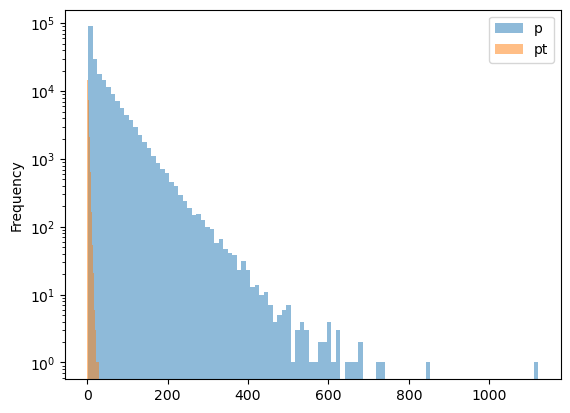

In [6]:

datafile['p'].plot.hist(bins=100,log=True,alpha=0.5)
datafile['pt'].plot.hist(bins=100,log=True,alpha=0.5)

plt.legend()


In [7]:
datafile_temp=datafile.copy()


datafile_temp['pz']=np.sqrt(datafile_temp['p']**2-datafile_temp['pt']**2)

datafile_temp['epz']=datafile_temp['ep']*(datafile_temp['p']/datafile_temp['pz'])

<AxesSubplot: xlabel='pz', ylabel='epz'>

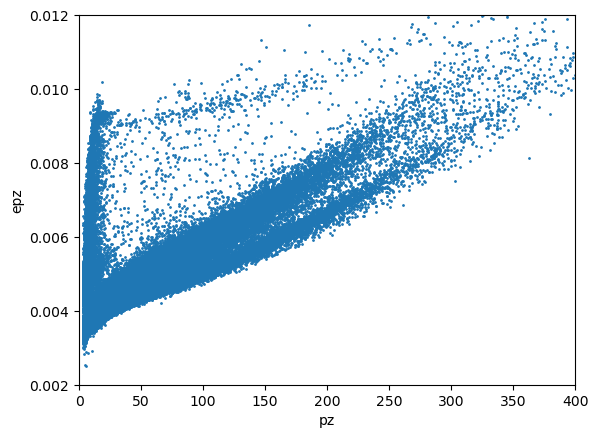

In [8]:

datafile_temp.plot.scatter(x='pz',y='epz',xlim=(0,400),ylim=(0.002,0.012),s=1)

### Exercise3

In [15]:
input_data = datafile[["p","tx","ty","eta","phi"]].values
target = datafile["ep"].values

#numofinputs=5(p,tx,ty,eta,phi),numofoutputs=1(ep)
num_inputs=5 
num_outputs=1
#simple Keras model:use same #of nodes as # of inputs,singlelayer
num_nodes=num_inputs
def simple_model():
    #createmodel
    model=Sequential()
    #no activation required for the output,as this is a regression problem,
    #ie.we need a numerical prediction for any input
    model.add(Dense(num_nodes,input_dim=num_inputs,kernel_initializer="normal",activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs,kernel_initializer="normal"))
    #Compile model
    model.compile(loss="mean_squared_error",optimizer="adam")
    return model

In [13]:
N_epochs = 100
batchSize = 
# must always set the random seed for r ep ro du c ib il it y
Answer_to_all_questions = 42
np.random.seed ( Answer_to_all_questions )
estimator = KerasRegressor( build_fn = simple_model , epochs = N_epochs , batch_size = batchSize ,verbose=1)
kfold = KFold ( n_splits =10 , random_state = Answer_to_all_questions , shuffle = True )
# data and target are 5 - column and 1 - column arrays produced with pandas . DataFrame . values
results = cross_val_score( estimator , input_data , target, cv = kfold , scoring = "r2")
print ("Standardised : %.2f %s %.2f " %(results.mean(),u"\u00B1 ",results.std()))

/var/folders/2f/y14hzqx53r56d9npnh5jl95m0000gp/T/ipykernel_6402/1109769346.py:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor( build_fn = simple_model , epochs = N_epochs , batch_size = batchSize ,verbose=1)


Epoch 1/50
735/735 [==============================] - 3s 3ms/step - loss: 8.3904e-05
Epoch 2/50
735/735 [==============================] - 2s 2ms/step - loss: 4.4602e-07
Epoch 3/50
735/735 [==============================] - 2s 2ms/step - loss: 4.4018e-07
Epoch 4/50
735/735 [==============================] - 1s 2ms/step - loss: 4.4393e-07
Epoch 5/50
735/735 [==============================] - 1s 2ms/step - loss: 4.3322e-07
Epoch 6/50
735/735 [==============================] - 1s 2ms/step - loss: 4.4214e-07
Epoch 7/50
735/735 [==============================] - 1s 2ms/step - loss: 4.4453e-07
Epoch 8/50
735/735 [==============================] - 1s 2ms/step - loss: 4.3430e-07
Epoch 9/50
735/735 [==============================] - 1s 1ms/step - loss: 4.2670e-07
Epoch 10/50
735/735 [==============================] - 1s 2ms/step - loss: 4.2138e-07
Epoch 11/50
735/735 [==============================] - 2s 2ms/step - loss: 4.1803e-07
Epoch 12/50
735/735 [==============================] - 1s 2ms/s

In [14]:
estimators = []
estimators.append(( "standardize" , StandardScaler()))
estimators.append(( "mlp" , KerasRegressor( build_fn = simple_model , epochs = N_epochs , batch_size = batchSize )))
pipeline = Pipeline ( estimators )
kfold = KFold ( n_splits =10 , random_state = Answer_to_all_questions , shuffle = True )
# data and target are 5 - column and 1 - column arrays produced with pandas . DataFrame . values
results = cross_val_score( estimator , input_data , target, cv = kfold , scoring = "r2")
print ("Standardised : %.2f %s %.2f " %(results.mean(),u"\u00B1 ",results.std()))

Epoch 1/50


/var/folders/2f/y14hzqx53r56d9npnh5jl95m0000gp/T/ipykernel_6402/1132883279.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(( "mlp" , KerasRegressor( build_fn = simple_model , epochs = N_epochs , batch_size = batchSize )))


735/735 [==============================] - 2s 2ms/step - loss: 2.7677e-04
Epoch 2/50
735/735 [==============================] - 1s 2ms/step - loss: 7.4326e-07
Epoch 3/50
735/735 [==============================] - 1s 2ms/step - loss: 5.9771e-07
Epoch 4/50
735/735 [==============================] - 1s 2ms/step - loss: 5.9669e-07
Epoch 5/50
735/735 [==============================] - 1s 2ms/step - loss: 5.7940e-07
Epoch 6/50
735/735 [==============================] - 1s 2ms/step - loss: 5.5781e-07
Epoch 7/50
735/735 [==============================] - 1s 2ms/step - loss: 5.1752e-07
Epoch 8/50
735/735 [==============================] - 1s 2ms/step - loss: 5.0170e-07
Epoch 9/50
735/735 [==============================] - 1s 2ms/step - loss: 4.8209e-07
Epoch 10/50
735/735 [==============================] - 1s 2ms/step - loss: 4.7630e-07
Epoch 11/50
735/735 [==============================] - 1s 2ms/step - loss: 4.7573e-07
Epoch 12/50
735/735 [==============================] - 1s 2ms/step - loss:

In [16]:
import os

def notify(title, text):
    os.system("""
              osascript -e 'display notification "{}" with title "{}"'
              """.format(text, title))


def reg_run(model):
    estimators = []
    estimators.append(( "standardize" , StandardScaler()))
    estimators.append(( "mlp" , KerasRegressor( build_fn = model , epochs = N_epochs , batch_size = batchSize )))
    pipeline = Pipeline ( estimators )
    kfold = KFold ( n_splits =10 , random_state = Answer_to_all_questions , shuffle = True )
    # data and target are 5 - column and 1 - column arrays produced with pandas . DataFrame . values
    results = cross_val_score( estimator , input_data , target, cv = kfold , scoring = "r2")
    print ("Standardised : %.2f %s %.2f " %(results.mean(),u"\u00B1 ",results.std()))
    
    notify("Cell Execution", "Run Complete")
    return results.mean()

In [17]:
def denser_model():
    #createmodel
    model=Sequential()
    #no activation required for the output,as this is a regression problem,
    #ie.we need a numerical prediction for any input
    model.add(Dense(num_nodes,input_dim=num_inputs,kernel_initializer="normal",activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(32,kernel_initializer="normal",activation="relu"))
    model.add(Dense(num_outputs,kernel_initializer="normal"))
    #Compile model
    model.compile(loss="mean_squared_error",optimizer="adam")
    return model

def wider_model():
    #createmodel
    model=Sequential()
    #no activation required for the output,as this is a regression problem,
    #ie.we need a numerical prediction for any input
    model.add(Dense(2*num_nodes,input_dim=num_inputs,kernel_initializer="normal",activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs,kernel_initializer="normal"))
    #Compile model
    model.compile(loss="mean_squared_error",optimizer="adam")
    return model



In [18]:
reg_run(denser_model)

Epoch 1/50


/var/folders/2f/y14hzqx53r56d9npnh5jl95m0000gp/T/ipykernel_6402/3935835687.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(( "mlp" , KerasRegressor( build_fn = model , epochs = N_epochs , batch_size = batchSize )))


735/735 [==============================] - 2s 2ms/step - loss: 2.1200e-05
Epoch 2/50
735/735 [==============================] - 1s 2ms/step - loss: 5.4981e-07
Epoch 3/50
735/735 [==============================] - 1s 2ms/step - loss: 5.4906e-07
Epoch 4/50
735/735 [==============================] - 1s 1ms/step - loss: 5.6056e-07
Epoch 5/50
735/735 [==============================] - 1s 1ms/step - loss: 5.6605e-07
Epoch 6/50
735/735 [==============================] - 1s 1ms/step - loss: 5.4876e-07
Epoch 7/50
735/735 [==============================] - 1s 1ms/step - loss: 5.4520e-07
Epoch 8/50
735/735 [==============================] - 1s 1ms/step - loss: 5.1252e-07
Epoch 9/50
735/735 [==============================] - 1s 1ms/step - loss: 4.6884e-07
Epoch 10/50
735/735 [==============================] - 1s 1ms/step - loss: 4.7242e-07
Epoch 11/50
735/735 [==============================] - 1s 1ms/step - loss: 4.7365e-07
Epoch 12/50
735/735 [==============================] - 1s 1ms/step - loss:

0.6664680216186839

In [19]:
reg_run(wider_model)

/var/folders/2f/y14hzqx53r56d9npnh5jl95m0000gp/T/ipykernel_6402/3935835687.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(( "mlp" , KerasRegressor( build_fn = model , epochs = N_epochs , batch_size = batchSize )))


Epoch 1/50
735/735 [==============================] - 2s 2ms/step - loss: 5.0144e-06
Epoch 2/50
735/735 [==============================] - 1s 2ms/step - loss: 4.8026e-07
Epoch 3/50
735/735 [==============================] - 2s 2ms/step - loss: 4.9297e-07
Epoch 4/50
735/735 [==============================] - 1s 2ms/step - loss: 5.0380e-07
Epoch 5/50
735/735 [==============================] - 1s 2ms/step - loss: 4.9913e-07
Epoch 6/50
735/735 [==============================] - 1s 2ms/step - loss: 4.9700e-07
Epoch 7/50
735/735 [==============================] - 2s 2ms/step - loss: 4.7650e-07
Epoch 8/50
735/735 [==============================] - 2s 2ms/step - loss: 4.7956e-07
Epoch 9/50
735/735 [==============================] - 1s 2ms/step - loss: 4.7290e-07
Epoch 10/50
735/735 [==============================] - 1s 2ms/step - loss: 4.6610e-07
Epoch 11/50
735/735 [==============================] - 2s 2ms/step - loss: 4.6981e-07
Epoch 12/50
735/735 [==============================] - 1s 2ms/s

In [ ]:

def widening_model():
    #createmodel
    model=Sequential()
    #no activation required for the output,as this is a regression problem,
    #ie.we need a numerical prediction for any input
    model.add(Dense(num_nodes,input_dim=num_inputs,kernel_initializer="normal",activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(8*num_nodes,input_dim=num_inputs,kernel_initializer="normal",activation="relu"))
    
    model.add(Dense(num_outputs,kernel_initializer="normal"))
    #Compile model
    model.compile(loss="mean_squared_error",optimizer="adam")
    return model

def even_wider_model():
    #createmodel
    model=Sequential()
    #no activation required for the output,as this is a regression problem,
    #ie.we need a numerical prediction for any input
    model.add(Dense(4*num_nodes,input_dim=num_inputs,kernel_initializer="normal",activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs,kernel_initializer="normal"))
    #Compile model
    model.compile(loss="mean_squared_error",optimizer="adam")
    return model



In [ ]:
a  = reg_run(even_wider_model)

NameError: name 'reg_run' is not defined